https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [1]:
# Precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, auc

from matplotlib import pyplot

In [2]:
# Generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
# Split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [4]:
# Fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [5]:
# Predict probabilities
lr_probs = model.predict_proba(testX)

In [6]:
# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [7]:
# Predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

In [8]:
# Summarize scores
print(f'Logistic: f1={lr_f1} auc={lr_auc}')

Logistic: f1=0.8413001912045889 auc=0.8977244980325833


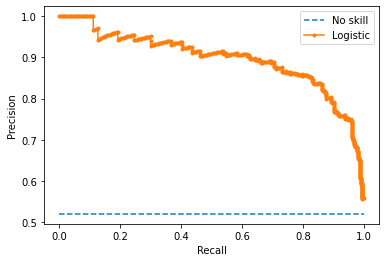

In [9]:
# Plot the precision recall curves
no_skill = len(testy[testy==1])/len(testy)
pyplot.plot([0,1],[no_skill, no_skill], linestyle='--', label='No skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# Axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# Show the legend
pyplot.legend()
# show the plot
pyplot.show()